# **Waze User Churn Project** 

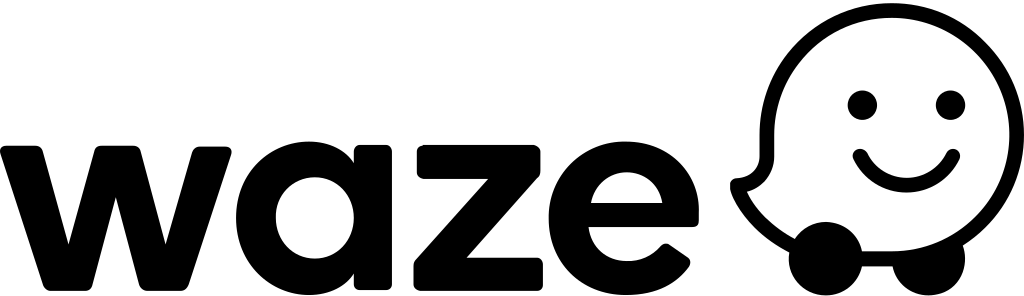

## **Company Background:** 
Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. 

You’ll collaborate with your Waze teammates to analyze and interpret data, generate valuable insights, and help leadership make informed business decisions. Your team is about to start a new project to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. 

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as: 
 - Who are the users most likely to churn?
 - Why do users churn? 
 - When do users churn? 

### **Contents:** 
 1. [Preliminary Data Summary](#1)
 2. [Exploratory Data Analysis](#2)
 3. [Hypothesis Testing](#3)
 4. [Regression Analysis](#4)
 5. [Building a Machine Learning Model](#5)
 6. [Conclusions and Business Recommendations](#6)

<a id="1"></a>
### **1. Preliminary Data Summary**

#### **Introduction**

The goal of this project is to predict user churn for Waze using historical driving data. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. We will analyze user data and develop a machine learning model that predicts user churn. High retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business.

#### **Objective**

The data team’s objective is to develop a machine learning model that will accurately predict and identify the key factors that contribute to user churn. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business.

#### **Summary**
In this project, I analysed driving behavior data to predict user churn for Waze. I performed EDA, handled missing values and outliers, and built classification models to predict churn. By improving the app experience for professional drivers, increasing engagement for low-activity users, and analysing the insights to create personalized retention strategies, Waze can significantly reduce churn and increase long-term user retention. These insights provide actionable steps for Waze to retain its most valuable users.

#### **Imports and data loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option("display.max_columns", None)

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LogisticRegression

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, \
PrecisionRecallDisplay,classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Function that helps plot feature importance
from xgboost import plot_importance

import pickle

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/inarailean/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <F2F42313-BF4F-3B95-A853-AE1DE94D4C87> /Users/inarailean/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
# Load dataset into dataframe
df = pd.read_csv("waze_dataset.csv")

#### **Summary information**

In [ ]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df.size

194987

In [ ]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


*Consider the following questions:*

1. *When reviewing the `df.head()` output, are there any variables that have missing values?* \
After the inspection of first 10 rows, there are no missing values detected, however there are null values reported using info() method.
2. *When reviewing the `df.info()` output, what are the data types? How many rows and columns do you have?* \
There are 13 columns and 14999 rows. Variables data types are: float64(3), int64(8), object(2).
3. *Does the dataset have any missing values?* \
"Label" column has 700 missing values.


#### **Null values and summary statistics**

Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

In [ ]:
# Isolate rows with null values
df_null = df[df["label"].isnull()]

# Display summary stats of rows with null values
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [ ]:
# Isolate rows without null values
df_not_null = df[df["label"].notnull()]

# Display summary stats of rows without null values
df_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


There is no discernible difference between the two populations, only the row numbers: 700 in first case and 14299 in second. In average, the first population used the app slightly less than the second population.

#### **Null values - device counts**

Next, check the two populations with respect to the `device` variable.

*How many iPhone users had null values and how many Android users had null values?*

In [ ]:
# Get count of null values by device
print("Null values for iPhone users:", len(df_null[df_null["device"]=="iPhone"]))
print("Null values for Android users:", len(df_null[df_null["device"]=="Android"]))  

Null values for iPhone users: 447
Null values for Android users: 253


Now, of the rows with null values, the percentage with each device&mdash;Android and iPhone is being calculated.

In [ ]:
# Calculate % of iPhone nulls and Android nulls
df_null["device"].value_counts("iPhone")

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

How does this compare to the device ratio in the full dataset?

In [ ]:
# Calculate % of iPhone users and Android users in full dataset
df_not_null["device"].value_counts("iPhone")

device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.
There is nothing to suggest a non-random cause of the missing data.

Examine the counts and percentages of users who churned vs. those who were retained. *How many of each group are represented in the data?*

In [ ]:
# Calculate counts of churned vs. retained
df["label"].value_counts("retained")

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

This dataset contains 82% retained users and 18% churned users.

Next, compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that you don't want outliers to unduly affect the portrayal of a typical user. Notice, for example, that the maximum value in the `driven_km_drives` column is 21,183 km. That's more than half the circumference of the earth!

In [ ]:
# Calculate median values of all columns for churned and retained users
df_churned = df[df["label"] =="churned"]
df_retained = df[df["label"] =="retained"]
print("Churned median:\n", df_churned.median(numeric_only=True))
print("\nRetained median:\n", df_retained.median(numeric_only=True))

Churned median:
 ID                         7477.500000
sessions                     59.000000
drives                       50.000000
total_sessions              164.339042
n_days_after_onboarding    1321.000000
total_navigations_fav1       84.500000
total_navigations_fav2       11.000000
driven_km_drives           3652.655666
duration_minutes_drives    1607.183785
activity_days                 8.000000
driving_days                  6.000000
dtype: float64

Retained median:
 ID                         7509.000000
sessions                     56.000000
drives                       47.000000
total_sessions              157.586756
n_days_after_onboarding    1843.000000
total_navigations_fav1       68.000000
total_navigations_fav2        9.000000
driven_km_drives           3464.684614
duration_minutes_drives    1458.046141
activity_days                17.000000
driving_days                 14.000000
dtype: float64


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile. Continue exploring!

Calculate the median kilometers per drive in the last month for both retained and churned users.

Begin by dividing the `driven_km_drives` column by the `drives` column. Then, group the results by churned/retained and calculate the median km/drive of each group.

In [ ]:
# Add a column to df called `km_per_drive`
df["km_per_drive"] = df["driven_km_drives"]/df["drives"]

# Group by `label`, calculate the median, and isolate for km per drive
(df.groupby(["label"]).median(numeric_only=True))["km_per_drive"] 

label
churned     74.109416
retained    75.014702
Name: km_per_drive, dtype: float64

In [ ]:
# Add a column to df called `km_per_driving_day`
df["km_per_driving_day"] = df["driven_km_drives"]/df["driving_days"] 

# Group by `label`, calculate the median, and isolate for km per driving day
df.groupby(["label"]).median(numeric_only=True)["km_per_driving_day"]

label
churned     697.541999
retained    289.549333
Name: km_per_driving_day, dtype: float64

The median retained user drove about one more kilometer per drive than the median churned user. How many kilometers per driving day was this?

To calculate this statistic, repeat the steps above using `driving_days` instead of `drives`.

Now, calculate the median number of drives per driving day for each group.

In [ ]:
# Add a column to df called `drives_per_driving_day`
df["drives_per_driving_day"] = df["drives"]/df["driving_days"]

# Group by `label`, calculate the median, and isolate for drives per driving day
(df.groupby(["label"]).median(numeric_only=True))["drives_per_driving_day"]

label
churned     10.0000
retained     4.0625
Name: drives_per_driving_day, dtype: float64

The median user who churned drove 698 kilometers each day they drove last month, which is almost ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

Finally, examine whether there is an imbalance in how many users churned by device type.

Begin by getting the overall counts of each device type for each group, churned and retained.

In [ ]:
# For each label, calculate the number of Android users and iPhone users
df[["label", "device"]].value_counts()
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778


Now, within each group, churned and retained, calculate what percent was Android and what percent was iPhone.

In [ ]:
# For each label, calculate the percentage of Android users and iPhone users
df[["label", "device"]].value_counts(normalize=True)

label     device 
retained  iPhone     0.530107
          Android    0.292538
churned   iPhone     0.115043
          Android    0.062312
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.


#### **Conclusion**

Recall that your supervisor, May Santer, asked you to share your findings with the data team in an executive summary. Consider the following questions as you prepare to write your summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. *Did the data contain any missing values? How many, and which variables were affected? Was there a pattern to the missing data?* \
Data contains missing values: column "label", 700 cells with missing value. No pattern for the missing data.
2. *What is a benefit of using the median value of a sample instead of the mean?* \
The benefits of using median instead of mean is to isolate outliers to unduly affect the portrayal of a typical user.
3. *Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?* \
There is a question about why so many churned users are driving so many km per day, maybe they are professional drivers? There is a need of more information.
4. *What percentage of the users in the dataset were Android users and what percentage were iPhone users?* \
In the whole dataset are 64% iPhone users and 36% Android users.
5. *What were some distinguishing characteristics of users who churned vs. users who were retained?* \
The users who churned in average, are driving more distance and having more drives then the retained users.
6. *Was there an appreciable difference in churn rate between iPhone users vs. Android users?* \
There is no appreciable difference between iPhone vs Android users churn rates. 

<a id="2"></a>
### **2. Exploratory Data Analysis**

In this activity, you will examine data provided and prepare it for analysis.

**The purpose** of this part of the project is to conduct exploratory data analysis (EDA) on a provided dataset.


**Questions:**
1. *Does the data need to be restructured or converted into usable formats?* \
No, the data doesn't need to be restructured.
2. *Are there any variables that have missing data?* \
Yes, label column has 700 missing values.
3. *Given the scenario, which data columns are most applicable?* \
Label is the most applicable column as it identifies the client type: retained or churned. Other columns are also important to identify through client behaviour patterns, insights in order to respond the question about churning.
4. *Which data columns can you eliminate, knowing they won’t solve your problem scenario?* \
The ID columns can be eliminated.
5. *How would you check for missing data? And how would you handle missing data (if any)?* \
I will use info() method to find the column and the number of missing values. I will investigate if the missing data has some pattern or is completely random, what is the impact if the rows with missing values are deleted. Will it have an impact on the statistical results and insights?
6. *How would you check for outliers? And how would handle outliers (if any)?* \
I would use describe() function. If there is one or some global outlier, that are a small number and not influencing the results. They can be deleted. Others should be checked if there is no some error in the data, and others just kept.
7. *What are some ways to identify outliers?* \
Can be used some statistical functions such as describe(), mean, median, max, min. Also, in this case visualizations such as distribution charts are very useful.
8. *How do you make the decision to keep or exclude outliers from any future models?* \
If there is one or some global outlier, that are a small number and not influencing the results. They can be deleted. Others should be checked if there is no some error in the data, and others just kept.

#### **Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

*What type of data visualization(s) will be most helpful?*
 - Box plot - are useful to determine the deviation and the outliers.
 - Histogram - are helpful to determine the distribution.
 - Scatter plot - are useful to see how variables interact with each other.
 - Bar chart - are good to visualize the quantity by category. 
 
 
 
Begin by examining the spread and distribution of important variables using box plots and histograms.

In [ ]:
# Hides future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### **`sessions`**
The number of occurrence of a user opening the app during the month

Text(0.5, 1.0, 'Sessions - box plot')

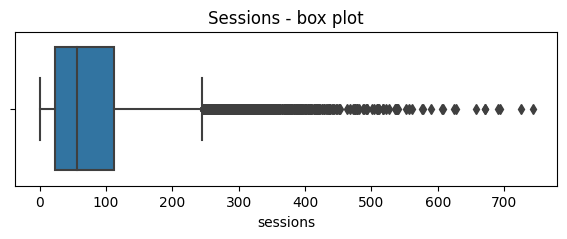

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
sns.boxplot(x=df["sessions"])
plt.title("Sessions - box plot")

Text(0.5, 1.0, 'Sessions - histogram')

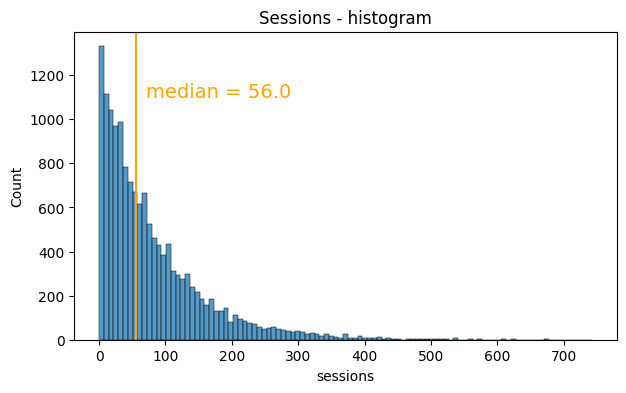

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["sessions"])
median = df["sessions"].median(numeric_only = True)
plt.axvline(median, color="orange", label = median)
plt.text(70, 1100, f"median = {median}", color="orange", fontsize = 14)
plt.title("Sessions - histogram")

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**
An occurrence of driving at least 1 km during the month

Text(0.5, 1.0, 'Drives - box plot')

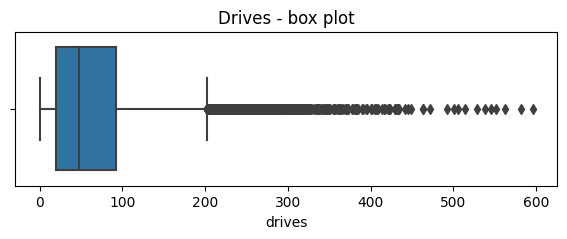

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
sns.boxplot(x=df["drives"])
plt.title("Drives - box plot")

Text(0.5, 1.0, 'Drives - histogram')

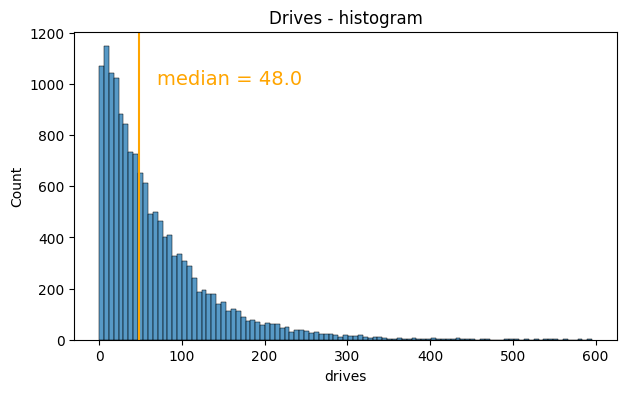

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["drives"])
median = df["drives"].median()
plt.axvline(median, color="orange", label = median)
plt.text(70, 1000, f"median = {median}", color="orange", fontsize = 14)
plt.title("Drives - histogram")

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**
A model estimate of the total number of sessions since a user has onboarded

Text(0.5, 1.0, 'Total_sessions - box plot')

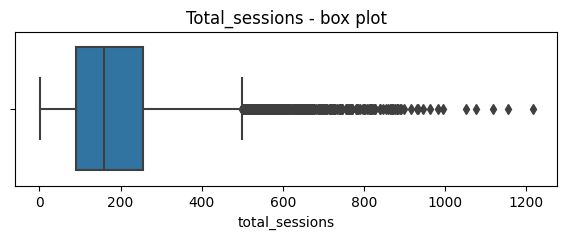

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
sns.boxplot(x=df["total_sessions"])
plt.title("Total_sessions - box plot")

Text(0.5, 1.0, 'Total_sessions - histogram')

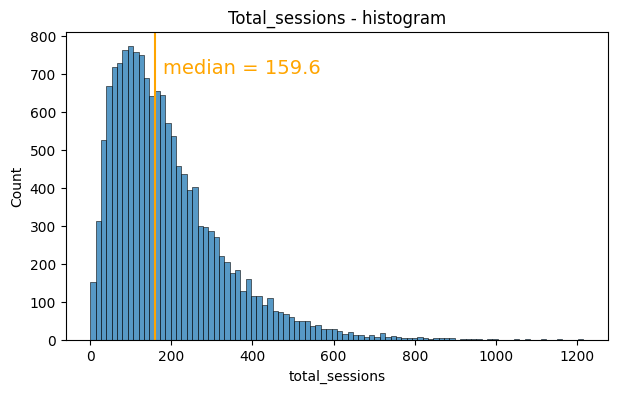

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["total_sessions"])
median = round(df["total_sessions"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(180, 700, f"median = {median}", color="orange", fontsize = 14)
plt.title("Total_sessions - histogram")

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**
The number of days since a user signed up for the app

Text(0.5, 1.0, 'n_days_after_onboarding - box plot')

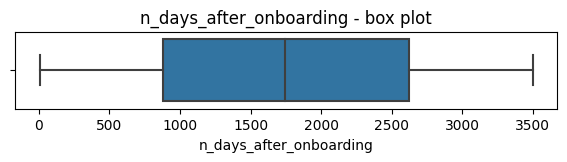

In [ ]:
# Box plot
plt.figure(figsize=(7,1))
sns.boxplot(x=df["n_days_after_onboarding"])
plt.title("n_days_after_onboarding - box plot")

Text(0.5, 1.0, 'n_days_after_onboarding - histogram')

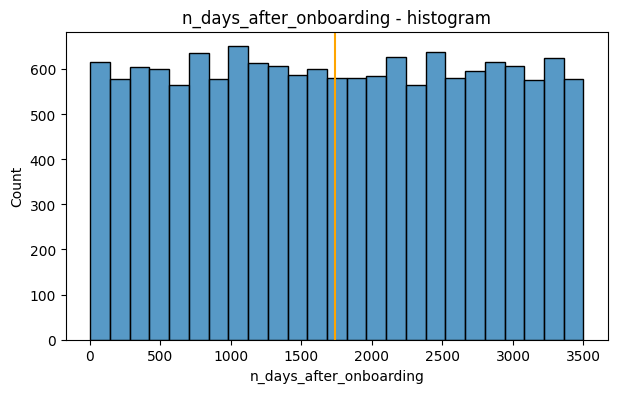

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["n_days_after_onboarding"])
median = round(df["n_days_after_onboarding"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.title("n_days_after_onboarding - histogram")

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**
Total kilometers driven during the month

Text(0.5, 1.0, 'driven_km_drives - box plot')

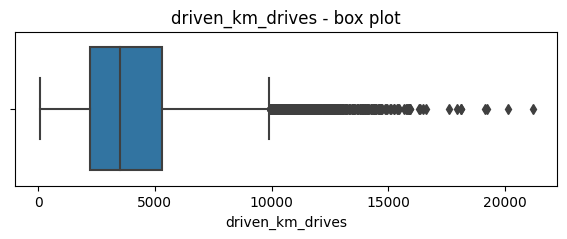

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
sns.boxplot(x=df["driven_km_drives"])
plt.title("driven_km_drives - box plot")

Text(0.5, 1.0, 'driven_km_drives - histogram')

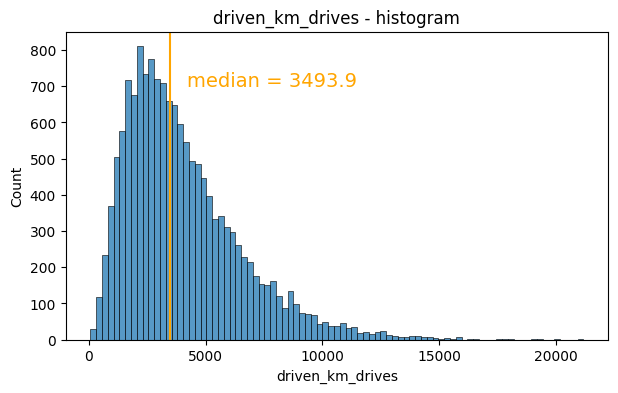

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["driven_km_drives"])
median = round(df["driven_km_drives"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(4200, 700, f"median = {median}", color="orange", fontsize = 14)
plt.title("driven_km_drives - histogram")

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**
Total duration driven in minutes during the month

Text(0.5, 1.0, 'duration_minutes_drives - box plot')

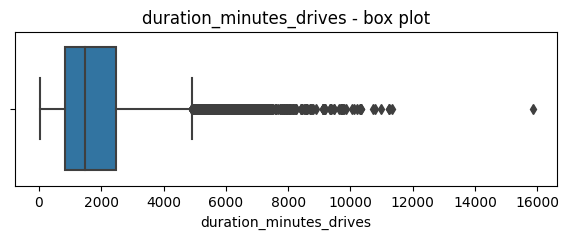

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
sns.boxplot(x=df["duration_minutes_drives"])
plt.title("duration_minutes_drives - box plot")

Text(0.5, 1.0, 'duration_minutes_drives - histogram')

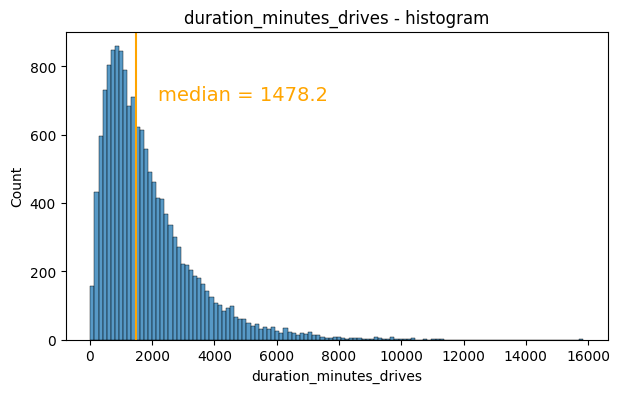

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["duration_minutes_drives"])
median = round(df["duration_minutes_drives"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(2200, 700, f"median = {median}", color="orange", fontsize = 14)
plt.title("duration_minutes_drives - histogram")

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**
Number of days the user opens the app during the month

Text(0.5, 1.0, 'activity_days - box plot')

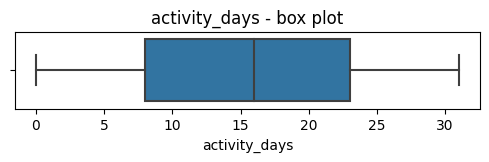

In [ ]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df["activity_days"])
plt.title("activity_days - box plot")

Text(0.5, 1.0, 'activity_days - histogram')

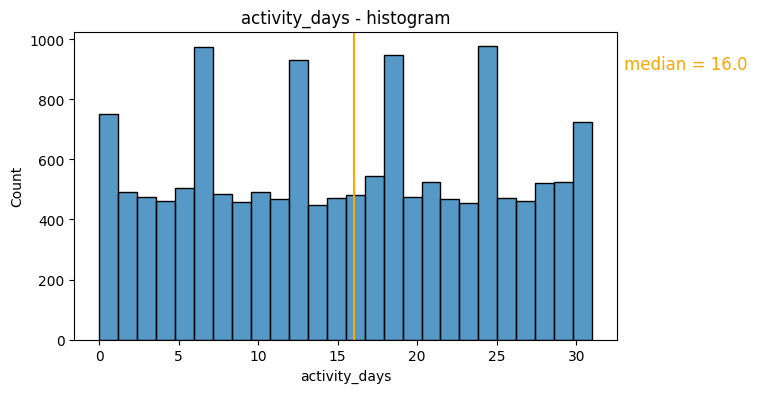

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["activity_days"])
median = round(df["activity_days"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(33, 900, f"median = {median}", color="orange", fontsize = 12)
plt.title("activity_days - histogram")

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**
Number of days the user drives (at least 1 km) during the month

Text(0.5, 1.0, 'driving_days - box plot')

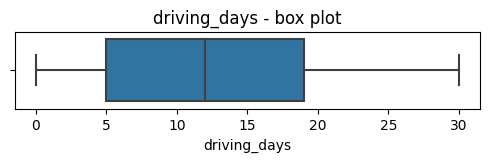

In [ ]:
# Box plot
plt.figure(figsize=(6,1))
sns.boxplot(x=df["driving_days"])
plt.title("driving_days - box plot")

Text(0.5, 1.0, 'driving_days - histogram')

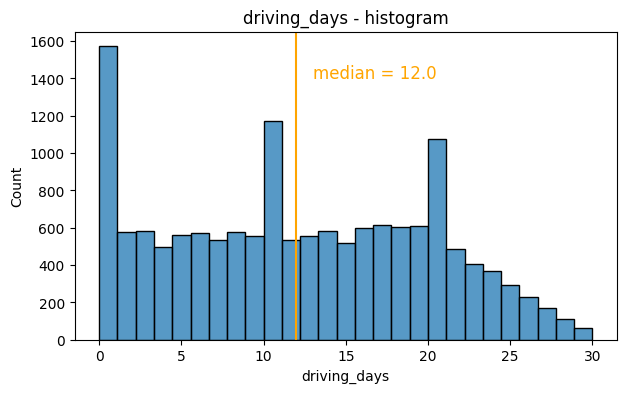

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["driving_days"])
median = round(df["driving_days"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(13, 1400, f"median = {median}", color="orange", fontsize = 12)
plt.title("driving_days - histogram")

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**
The type of device a user starts a session with.

This is a categorical variable, so a good plot for a binary categorical variable is a pie chart.

Text(0.5, 1.0, 'device - pie chart')

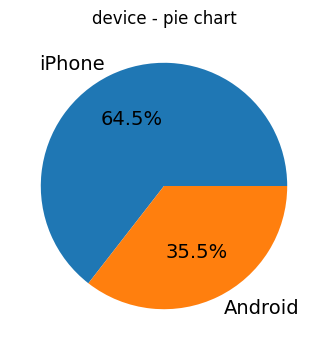

In [ ]:
# Pie chart
plt.figure(figsize=(4,4))
x = df["device"].value_counts()
plt.pie( x, labels = x.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("device - pie chart")

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**
Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month.

This is also a categorical variable, and as such would be plotted as a pie chart instead.

Text(0.5, 1.0, 'label - pie chart')

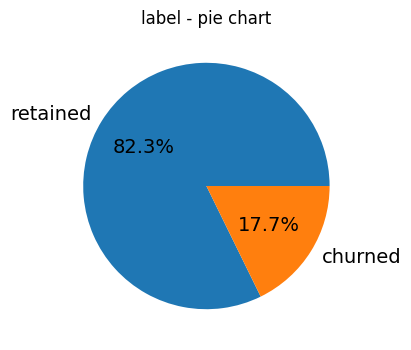

In [ ]:
# Pie chart
plt.figure(figsize=(4,4))
y = df["label"].value_counts()
plt.pie( y, labels = y.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("label - pie chart")

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**
Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

Text(0.5, 1.0, 'driving_days vs. activity_days - histogram')

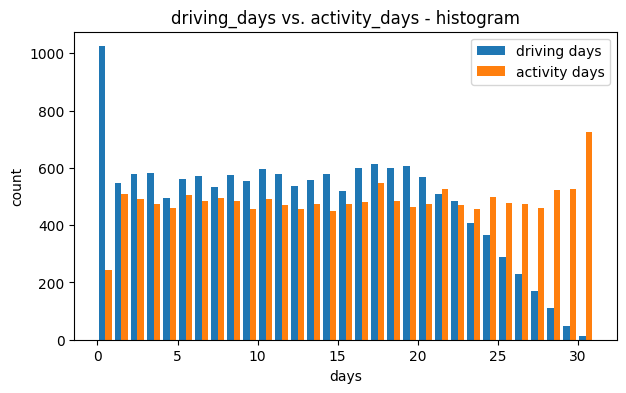

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
plt.hist([df["driving_days"], df["activity_days"]],
        label=["driving days", "activity days"],
        bins = range(0,32))
plt.xlabel("days")
plt.ylabel("count")
plt.legend()
plt.title("driving_days vs. activity_days - histogram")

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [ ]:
print(f"Driving days max: {df['driving_days'].max()}")
print(f"Activity days max: {df['activity_days'].max()}")

Driving days max: 30
Activity days max: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

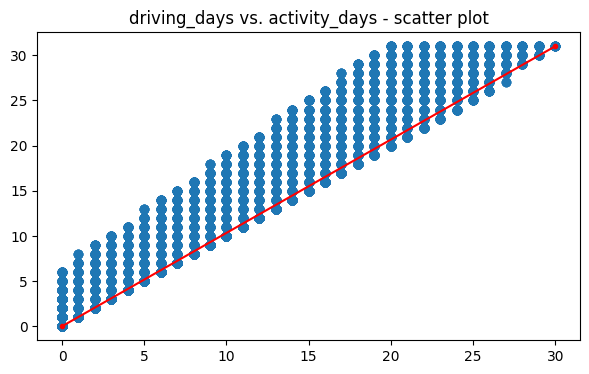

In [ ]:
# Scatter plot
plt.figure(figsize=(7,4))
plt.scatter(x=df["driving_days"], y=df["activity_days"])
plt.plot([0, df["driving_days"].max()], [0, df["activity_days"].max()], '.r-')
plt.title("driving_days vs. activity_days - scatter plot")
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

Text(0.5, 1.0, 'Retention by device histogram')

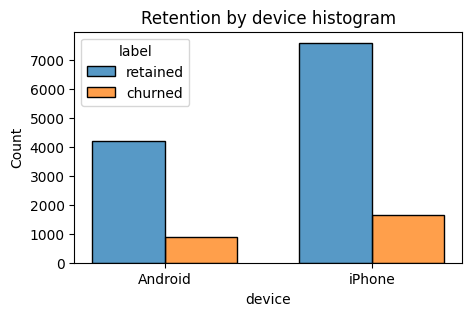

In [ ]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(df, x = "device", hue = "label", multiple = 'dodge', shrink = 0.7)
plt.title("Retention by device histogram")

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.
Call the `describe()` method on the new column.

In [ ]:
# Create `km_per_driving_day` column
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# Convert infinite values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0

# Call `describe()` on the new column
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained.

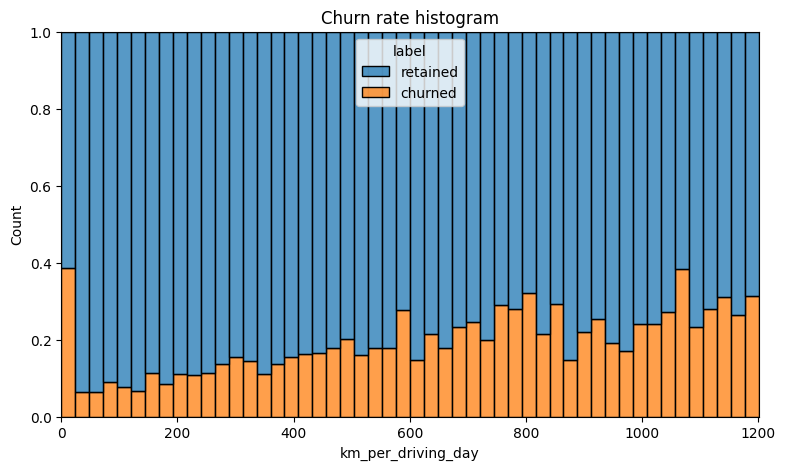

In [ ]:
# Histogram
plt.figure(figsize=(9,5)) 
sns.histplot(x = df["km_per_driving_day"],
             binrange=(0,1201),
             bins = 50,
             hue = df["label"],
             multiple = "fill")
plt.title("Churn rate histogram")
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**
Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

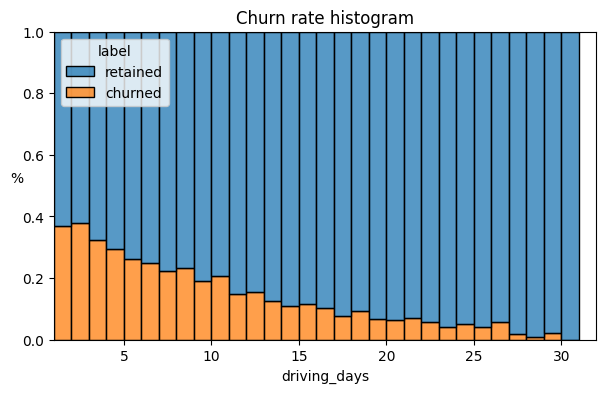

In [ ]:
# Histogram
plt.figure(figsize=(7,4))
sns.histplot(x=df["driving_days"], 
             binrange=(1,32),
             hue = df["label"], 
             multiple = "fill")
plt.ylabel('%', rotation = 0)
plt.title("Churn rate histogram")
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [ ]:
df["percent_sessions_in_last_month"] = round((df["sessions"]/df["total_sessions"] * 100), 1)

# The median value of the new column
df["percent_sessions_in_last_month"].median()

42.3

Text(0.5, 1.0, 'percent_sessions_in_last_month - histogram')

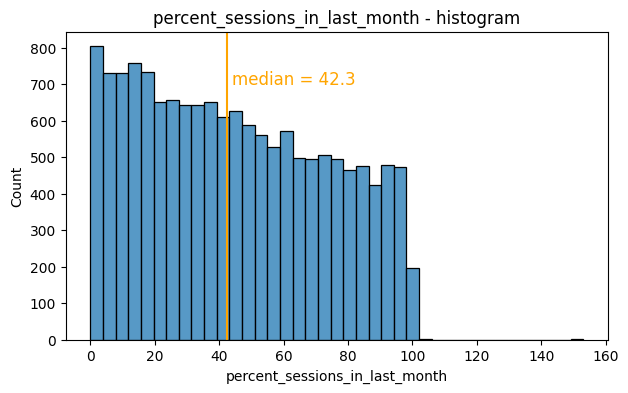

In [ ]:
# Histogram depicting the distribution of values in this new column.
plt.figure(figsize=(7,4))
sns.histplot(x=df["percent_sessions_in_last_month"])
median = round(df["percent_sessions_in_last_month"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(44, 700, f"median = {median}", color="orange", fontsize = 12)
plt.title("percent_sessions_in_last_month - histogram")

In [ ]:
# The median value of the `n_days_after_onboarding` variable.
df["n_days_after_onboarding"].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

Text(0.5, 1.0, 'n_days_after_onboarding for users >= 40% sessions on last month - histogram')

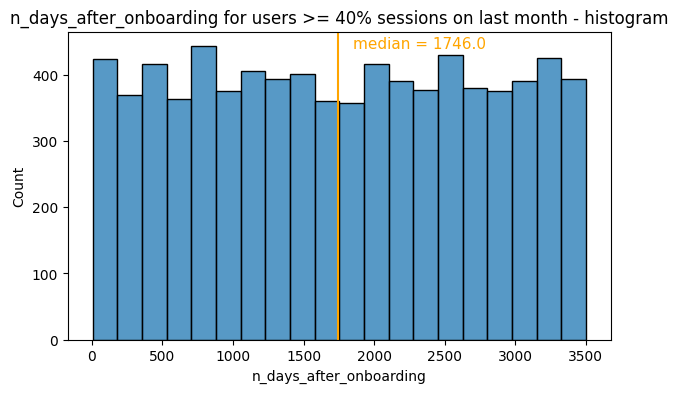

In [ ]:
# Histogram
y = df[df["percent_sessions_in_last_month"] >= 40]
plt.figure(figsize=(7,4))
sns.histplot(x=y["n_days_after_onboarding"])
median = round(y["n_days_after_onboarding"].median(), 1)
plt.axvline(median, color="orange", label = median)
plt.text(1850, 440, f"median = {median}", color="orange", fontsize = 11)
plt.title("n_days_after_onboarding for users >= 40% sessions on last month - histogram")

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

#### **Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.

In [ ]:
def outliers_handler(column, percentile):
    threshold = df[column].quantile(percentile)
    y = df.loc[df[column] > threshold, column] = threshold
    print(f"column: {column}; percentile: {percentile}; threshold: {threshold}")

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [ ]:
outliers_handler("sessions", 0.95)
outliers_handler("drives", 0.95)
outliers_handler("total_sessions", 0.95)
outliers_handler("driven_km_drives", 0.95)
outliers_handler("duration_minutes_drives", 0.95)

column: sessions; percentile: 0.95; threshold: 243.0
column: drives; percentile: 0.95; threshold: 201.0
column: total_sessions; percentile: 0.95; threshold: 454.3632037399997
column: driven_km_drives; percentile: 0.95; threshold: 8889.7942356
column: duration_minutes_drives; percentile: 0.95; threshold: 4668.899348999998


In [ ]:
# 1. Convert infinite values to zero
df.loc[df["km_per_drive"] == np.inf, "km_per_drive"] = 0
df.loc[df["drives_per_driving_day"] == np.inf, "drives_per_driving_day"] = 0
df.loc[df["drives_per_driving_day"] == np.NaN, "drives_per_driving_day"] = 0

df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14992.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,232.817946,578.963113,9.387368,44.925675
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,620.622351,1030.094384,19.826097,28.691512
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,32.424301,136.238895,1.250000,19.600000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,72.854343,272.889272,3.666667,42.300000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,179.347527,558.686918,9.000000,68.700000
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15777.426560,15420.234110,395.000000,153.100000


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

#### **Results and evaluation**

*Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?* \
I have learned that some data from label column is missing(700), it is tghe most important column for the porpose of this project, so it needs to be investigated. 
My other questions are why so many long-time users suddenly used the app so much in the last month.
My client would likely want to know that analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

*Did you consider color, contrast, emphasis, and labeling?* \
Yes, I considered color, contrast, emphasis and labeling.

In [ ]:
df['kms_per_minute_drives'] = (df['driven_km_drives']/df['duration_minutes_drives'])

In [ ]:
df['kms_per_minute_drives'].describe()
df[df['kms_per_minute_drives'] > 5]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,1.3,7.224522
22,22,churned,73,60,118.808812,1607,254,92,2653.436921,400.707310,16,16,iPhone,44.223949,165.839808,3.750000,61.4,6.621883
23,23,churned,29,23,33.137029,2188,338,0,4283.503913,654.519007,2,2,iPhone,186.239301,2141.751956,11.500000,87.5,6.544507
60,60,retained,49,42,68.316036,1195,132,9,2702.164267,244.054892,31,20,iPhone,64.337244,135.108213,2.100000,71.7,11.071953
66,66,retained,150,121,270.562906,1347,0,0,1791.379149,253.775879,30,26,iPhone,14.804786,68.899198,4.653846,55.4,7.058902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14953,14953,retained,69,55,254.110927,919,563,0,2261.632143,343.520301,20,20,Android,41.120584,113.081607,2.750000,27.2,6.583693
14955,14955,churned,16,14,313.774985,2523,309,23,2755.413646,362.091480,13,13,Android,196.815260,211.954896,1.076923,5.1,7.609717
14960,14960,retained,27,22,29.059583,1103,159,22,2136.623756,134.400129,22,17,iPhone,97.119262,125.683750,1.294118,92.9,15.897483
14993,14993,NaN,67,57,97.570074,1131,207,102,2267.052913,318.120634,27,26,iPhone,39.772858,87.194343,2.192308,68.7,7.126394


### **Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. *What types of distributions did you notice in the variables? What did this tell you about the data?* \
There are different types of distributions such as uniform, centered distributio and right-skewed distribution.
2. *Was there anything that led you to believe the data was erroneous or problematic in any way?* \ 
The missing data from label column, the big driven distances and the huge part of sessions and drives from the last month. The last one is related to the additional EDA that I realised and found 1761 rows of clients that drove in medium more than 300kms/hour wich is questionable.
3. *Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?* \
Why so many long-time users suddenly used the app so much in the last month.
4. *What percentage of users churned and what percentage were retained?* \
Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.
5. *What factors correlated with user churn? How?* \
The churn rate tends to increase as the mean daily distance driven increases. It would be worth investigating further the reasons for long-distance users to discontinue using the app.
6. *Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?* \
The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to ~ 3.500 (~ 9,5 years).

<a id="3"></a>
### **3. Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).


**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.

In order to perform this analysis, you must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_new`.
1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.

In [ ]:
# 1. Create `map_dictionary`
map_dictionary = {"iPhone": 1, "Android": 2}

# 2. Create new `device_type` column
df["device_type"] = df["device"]

# 3. Map the new column to the dictionary
df["device_type"] = df["device_type"].map(map_dictionary)

You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [ ]:
df.groupby("device_type")["drives"].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.

Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).

**Question:** What are your hypotheses for this data project?
𝐻0: There is no difference in the amount of drives between drivers using iPhone or Android device.
H1: There is a difference in the amount of drives between drivers using iPhone or Android device.
Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [ ]:
# 1. Isolate the `drives` column for iPhone users.
iPhone_drives = df[df["device_type"] == 1]["drives"]

# 2. Isolate the `drives` column for Android users.
Android_drives = df[df["device_type"] == 2]["drives"]

# 3. Perform the t-test
stats.ttest_ind(iPhone_drives, Android_drives, equal_var = False)

TtestResult(statistic=1.1643714136026293, pvalue=0.24429844267242223, df=11148.669519764011)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?
Based on the p_value which is 14,33% and it is higher than our significance level of 5 %, I fail to reject the null hypothesis which means that there is no difference in the amount of drives between drivers using iPhone or Android device.

<a id="4"></a>
### **4. Regression Analysis**

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.


#### **Explore data with EDA**
Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [ ]:
df = df.drop(["ID"], axis = 1)

#### **Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [ ]:
# Create `professional_driver` column
df["professional_driver"] = np.where((df["drives"]>=60) & (df["driving_days"]>=15), 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives,device_type,professional_driver
0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,95.4,1.323838,2,1
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,40.7,2.812805,1,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,84.1,1.899224,2,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,72.5,1.555852,1,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,49.9,3.239050,2,1


Perform a quick inspection of the new variable.
1. Check the count of professional drivers and non-professionals
2. Within each class (professional and non-professional) calculate the churn rate

In [ ]:
# 1. Check count of professionals and non-professionals
print(df["professional_driver"].value_counts())

# 2. Check in-class churn rate
df.groupby(["professional_driver"])["label"].value_counts(normalize = True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [ ]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=["label"])

#### **Impute outliers**

You rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, you determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [ ]:
# Impute outliers
columns = ["sessions", "drives", "total_sessions", "total_navigations_fav1", "total_navigations_fav2",
           "driven_km_drives", "duration_minutes_drives"]
for column in columns:
    limit = df[column].quantile(0.95)
    df.loc[df[column]>limit, column] = limit

#### **Encode categorical variables**
Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.
 - Assign a `0` for all `retained` users.
 - Assign a `1` for all `churned` users.
 - Save this variable as `label2` as to not overwrite the original `label` variable.
  
**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [ ]:
# Create binary `label2` column
df["label2"] = np.where((df["label"]=="churned") | (df["driving_days"]=="retained"), 1, 0)

#### **Determine whether assumptions have been met**
The following are the assumptions for logistic regression:
* Independent observations (This refers to how the data was collected.)
* No extreme outliers
* Little to no multicollinearity among X predictors
* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

##### ***Collinearity***

Check the correlation among predictor variables. First, generate a correlation matrix.

In [ ]:
df_corr = df.drop(["label", "device"], axis = 1)
df_corr.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives,device_type,professional_driver,label2
0,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,11.632058,138.360267,11.894737,95.4,1.323838,2,1,0
1,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,128.186173,1246.901868,9.727273,40.7,2.812805,1,0,0
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,32.201567,382.393602,11.875000,84.1,1.899224,2,0,0
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,22.839778,304.530374,13.333333,72.5,1.555852,1,0,0
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,58.091206,219.455667,3.777778,49.9,3.239050,2,1,0


In [ ]:
# Generate a correlation matrix
df_corr.corr()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives,device_type,professional_driver,label2
sessions,1.000000,0.996942,0.597299,0.007101,0.001858,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.316930,-0.011569,0.438096,0.614139,0.006515,-0.012704,0.443654,0.034911
drives,0.996942,1.000000,0.595396,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.320554,-0.010989,0.439281,0.614285,0.005651,-0.011684,0.444425,0.035865
total_sessions,0.597299,0.595396,1.000000,0.006615,0.000194,0.010363,0.001015,-0.000345,0.015757,0.012957,-0.191790,-0.016162,0.265944,-0.113448,0.003191,-0.012133,0.254532,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006615,1.000000,-0.002450,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.004090,0.011764,-0.000924,-0.000853,0.010628,0.011299,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000194,-0.002450,1.000000,0.002866,-0.007365,0.005646,0.010902,0.010419,-0.005389,-0.000197,0.012477,0.015188,-0.011889,0.001316,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010363,-0.004968,0.002866,1.000000,0.003567,-0.003009,-0.004425,0.002000,0.003198,0.006751,0.002598,0.000609,0.008738,0.000275,0.007126,0.015032
driven_km_drives,0.002995,0.003445,0.001015,-0.004655,-0.007365,0.003567,1.000000,0.690547,-0.007445,-0.009550,0.225866,0.344765,0.013871,-0.002094,0.095457,0.002086,-0.000901,0.019771
duration_minutes_drives,-0.004545,-0.003889,-0.000345,-0.010167,0.005646,-0.003009,0.690547,1.000000,-0.007895,-0.009425,0.169051,0.239627,0.004652,-0.007890,-0.257003,0.007709,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015757,-0.009418,0.010902,-0.004425,-0.007445,-0.007895,1.000000,0.947687,-0.005193,-0.397433,-0.321353,0.017844,-0.012040,0.010221,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012957,-0.007321,0.010419,0.002000,-0.009550,-0.009425,0.947687,1.000000,-0.004005,-0.407917,-0.331380,0.013552,-0.009770,0.003859,0.469776,-0.294259


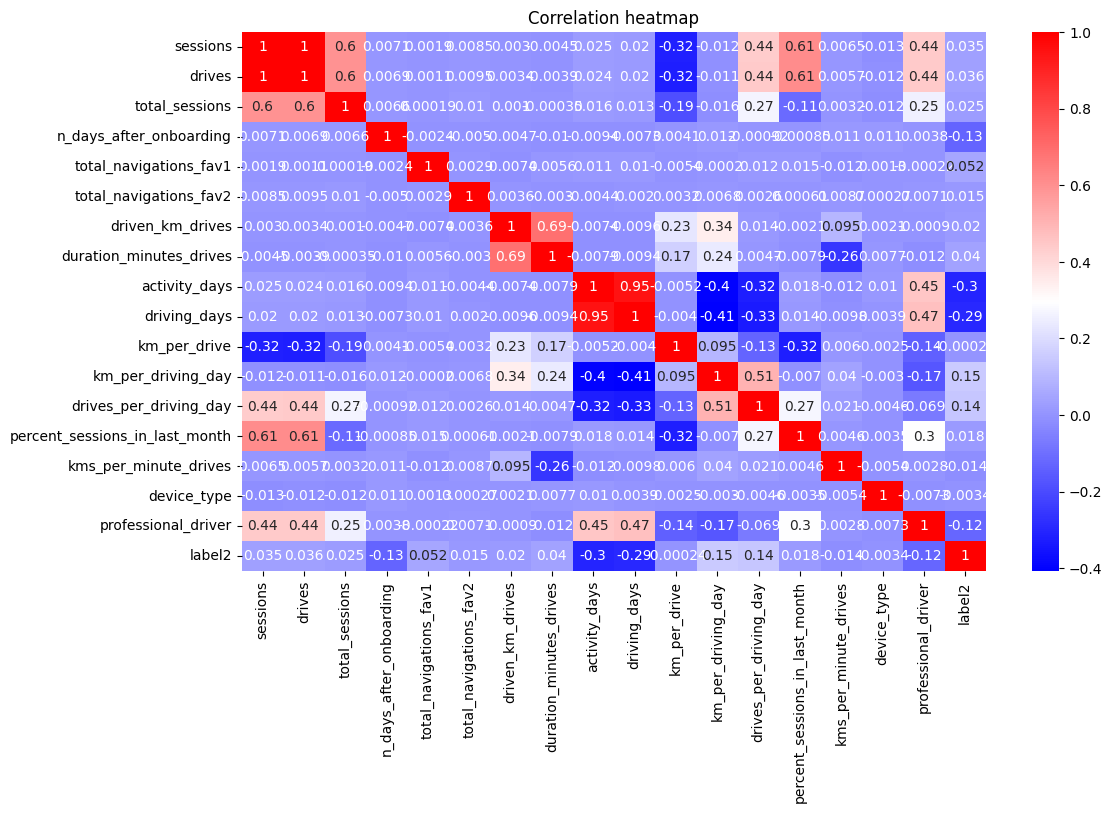

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df_corr.corr(method="pearson"), annot = True,  cmap="bwr")
plt.title("Correlation heatmap")
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

Variables with high collinearity: 
- Sessions and drives: collinearity 1.
- Activity days and driving days: collinearity 0.95

#### **Create dummies (if necessary)**

If you have selected `device` as an X variable, you will need to create dummy variables since this variable is categorical.

In cases with many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for your model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [ ]:
# Create new `device2` variable
df["device2"] = np.where((df["device"]=="iPhone"), 1, 0)

#### **Model building**

##### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:
* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [ ]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives,device_type,professional_driver,label2,device2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,95.4,1.323838,2,1,0,0
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,40.7,2.812805,1,0,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,84.1,1.899224,2,0,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,72.5,1.555852,1,0,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,49.9,3.239050,2,1,0,0


In [ ]:
# Isolate predictor variables
X = df.drop(columns = ["label", "label2","device", "sessions", "driving_days", "drives_per_driving_day"])

# Isolate target variable y
y = df["label2"]

##### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state=24)

# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_drive,km_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives,device_type,professional_driver,device2
364,80,105.930923,3064,48,124,1217.799876,604.095324,4,15.222498,0.000000,94.4,2.015907,2,0,0
14654,13,211.379318,694,143,0,6070.883321,1779.776229,29,466.991025,242.835333,8.0,3.411037,1,0,1
1141,47,107.735738,704,57,0,1799.773785,596.619033,29,38.293059,78.251034,53.8,3.016621,1,0,1
6461,46,144.400811,942,11,0,430.386992,185.614876,29,9.356239,17.932791,31.9,2.318710,2,0,0
3758,8,279.157753,2576,387,12,751.981608,437.141363,28,93.997701,30.079264,2.9,1.720225,1,0,1


Use scikit-learn to instantiate a logistic regression model. 

Add the argument `penalty = None`.
It is important to add `penalty = None` since your predictors are unscaled.

Fit the model on `X_train` and `y_train`.

In [ ]:
model = LogisticRegression(penalty = "none", max_iter= 350)
model.fit(X_train, y_train)

LogisticRegression(max_iter=350, penalty='none')

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [ ]:
model.coef_

array([[ 2.81217809e-03,  9.08920418e-05, -3.91397258e-04,
         1.17223862e-03,  1.09331402e-03, -3.35464259e-05,
         1.12793005e-04, -9.87008042e-02,  4.47843873e-05,
         2.98440719e-05, -1.26774478e-03, -4.44444752e-03,
        -1.43709579e-03, -1.51207786e-03, -4.77493173e-04]])

In [ ]:
# Call the model's `intercept_` attribute to get the intercept of the model.
model.intercept_

array([-0.00095729])

##### ***Check final assumption***

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [ ]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities 

array([[0.78110254, 0.21889746],
       [0.94850855, 0.05149145],
       [0.95269144, 0.04730856],
       ...,
       [0.83551028, 0.16448972],
       [0.83525762, 0.16474238],
       [0.63853238, 0.36146762]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.

In [ ]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data["logit"]= [np.log(prob[1]/prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

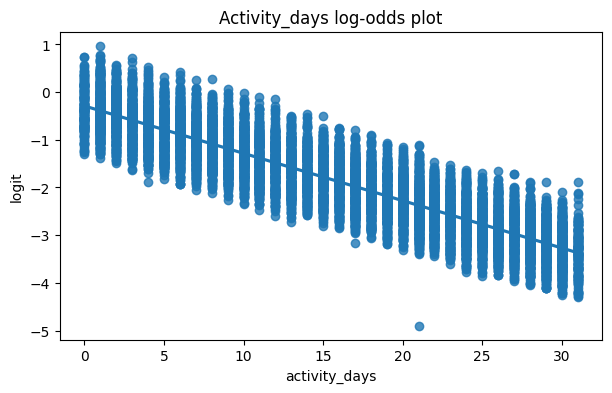

In [ ]:
# Plot regplot of `activity_days` log-odds
plt.figure(figsize= (7, 4))
sns.regplot(x = "activity_days", y = "logit" , data = logit_data)
plt.title("Activity_days log-odds plot")
plt.show()

#### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.

In [ ]:
# Generate predictions on X_test
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [ ]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8274125874125874

#### **Showing results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [ ]:
# Calculate precision manually
print("Precision:", "%.6f" % (cm[1,1] / (cm[1,1] + cm[0,1])))

# Calculate recall manually
print("Recall:", "%.6f" % (cm[1,1] / (cm[1,1] + cm[1,0])))

# Create a classification report
print(classification_report(y_test, y_pred, target_names = ["Retained", "Churned"]))

Precision: 0.593407
Recall: 0.085174
              precision    recall  f1-score   support

    Retained       0.83      0.99      0.90      2941
     Churned       0.59      0.09      0.15       634

    accuracy                           0.83      3575
   macro avg       0.71      0.54      0.53      3575
weighted avg       0.79      0.83      0.77      3575



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

#### **Extra**
Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [ ]:
# Create a list of (column_name, coefficient) tuples
list_of_tuples = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
list_of_tuples.sort(key=lambda x: x[1], reverse =True)

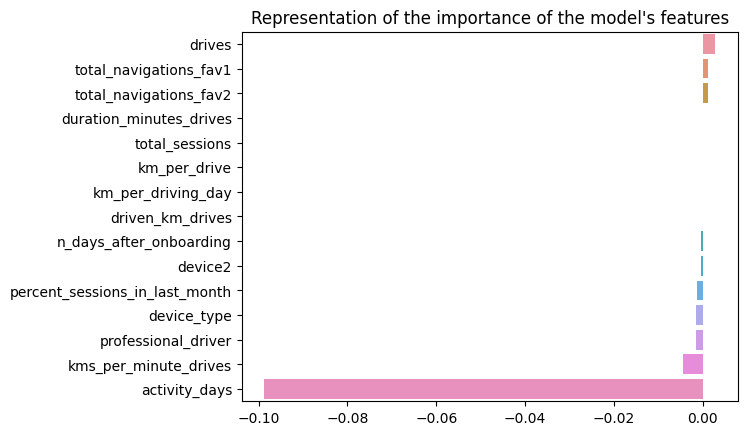

In [ ]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in list_of_tuples],
            y=[x[0] for x in list_of_tuples])
plt.title("Representation of the importance of the model's features")
plt.show()

#### **Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?

2. Were there any variables that you expected to be stronger predictors than they were?

3. Why might a variable you thought to be important not be important in the model?

4. Would you recommend that Waze use this model? Why or why not?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?


1. As we can see from the last plot, activity_days is a very influent variable. As we know from EDA analysis this variable is negatively correlated with churning and strongly correlated with "driving_days" variable.
2. Yes. We analysed in previous EDA some variables with strong correlation to churning rate, and that correlation was depicted in the heat map. Those variables are: "driven_kms_drives" and "total_sessions".
3. A variable might not be important in the model due to:
 - Multicollinearity: Redundancy with other predictors.
 - Interactions: Complex variable interactions overshadowing its effect.
 - Non-linear Relationships: Misrepresentation if the relationship is non-linear. 
 - Sample Size and Variability: Insufficient or highly variable data.
 - Model Specification: Inclusion of irrelevant variables or incorrect model design. 
 - Overfitting/Underfitting: Misleading importance due to model complexity issues.
4. This model can have value only if used to perform more exploratory analysis in the future. The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.
5. Remove or combine less predictive variables to reduce noise. Normalize or standardize predictor variables to improve model performance. Add interaction terms between variables to capture complex relationships. Apply techniques like Lasso or Ridge regression to penalize less important predictors and reduce overfitting. 
6. Create new features based on domain knowledge to capture better predictive signals.I would like to collect more information to help to categorize the user type as professional or not. This information could be: driving hours, how many different locations are users introducing/driving through during one month. 

<a id="5"></a>
### **5. Building a Machine Learning Model**

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>


#### **Feature engineering**

#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [ ]:
# Create `total_sessions_per_day` feature
df["total_sessions_per_day"]= df["total_sessions"]/df["n_days_after_onboarding"]

# Get descriptive stats
df["total_sessions_per_day"].describe()

count    14299.000000
mean         0.329996
std          1.292124
min          0.000298
25%          0.050818
50%          0.100457
75%          0.208580
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [ ]:
df["km_per_hour"] = df["driven_km_drives"] / (df["duration_minutes_drives"] / 60)

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [ ]:
# Create `percent_of_sessions_to_favorite` feature
df["percent_of_sessions_to_favorite"]= (df["total_navigations_fav1"] + df["total_navigations_fav2"]) / df["total_sessions"]

# Get descriptive stats
df["percent_of_sessions_to_favorite"].describe()

count    14299.000000
mean         1.575282
std          8.243636
min          0.000000
25%          0.212409
50%          0.648292
75%          1.593733
max        668.888397
Name: percent_of_sessions_to_favorite, dtype: float64

#### **Drop missing values**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [ ]:
# Drop rows with missing values
df = df.dropna(subset=["label"])

#### **Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Variable encoding**

#### **Dummying features**

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Each possible category of each feature will result in a feature for your model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding your model's predictions.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [ ]:
# Create new `device2` variable
df["device2"] = np.where(df["device"] == "Android", 0, 1)

#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

In [ ]:
# Create binary `label2` column
df["label2"] = np.where(df["label"] == "churned", 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,kms_per_minute_drives,device_type,professional_driver,label2,device2,total_sessions_per_day,km_per_hour,percent_of_sessions_to_favorite
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,95.4,1.323838,2,1,0,0,0.130381,79.430298,0.700931
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,40.7,2.812805,1,0,0,1,0.266854,168.768304,0.253903
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,84.1,1.899224,2,0,0,0,0.051121,113.953460,0.000000
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,72.5,1.555852,1,0,0,1,4.505948,93.351141,4.867640
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,49.9,3.239050,2,1,0,0,0.107713,194.342970,1.016363


#### **Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

#### **Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [ ]:
# Get class balance of 'label' col
df["label"].value_counts(normalize = True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

### **Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.


In [ ]:
# 1. Isolate X variables
X = df.drop(columns= ["label", "label2", "device", "drives_per_driving_day"])

# 2. Isolate y variable
y = df["label2"]

# 3. Split into train and test sets
X_int_train, X_test, y_int_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_int_train, y_int_train, stratify = y_int_train, test_size = 0.25, random_state = 42)

In [ ]:
# Number of samples in the partitioned data.
count=0
for i in [X_train, X_val, X_test]:
    count += len(i)
    print(len(i))
print("Total ", count)

8579
2860
2860
Total  14299


This aligns with expectations.

### **Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>
 
**Note:** To save time, this exemplar doesn't use multiple values for each parameter in the grid search, but you should include a range of values in your search to home in on the best set of parameters.

In [ ]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {"max_depth" : [None],
             "max_features" : [1.0], 
             "max_samples" : [1.0],
             "min_samples_leaf" : [0.001, 0.01],
             "min_samples_split" : [0.001, 0.01],
             "n_estimators" : [200]    
}

# 3. Define a dictionary of scoring metrics to capture
scoring = {"precision", "recall", "f1", "accuracy"}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(estimator=rf, param_grid=cv_params, scoring = scoring, cv=3, refit="recall")

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8579 entries, 627 to 11423
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sessions                         8579 non-null   int64  
 1   drives                           8579 non-null   int64  
 2   total_sessions                   8579 non-null   float64
 3   n_days_after_onboarding          8579 non-null   int64  
 4   total_navigations_fav1           8579 non-null   int64  
 5   total_navigations_fav2           8579 non-null   int64  
 6   driven_km_drives                 8579 non-null   float64
 7   duration_minutes_drives          8579 non-null   float64
 8   activity_days                    8579 non-null   int64  
 9   driving_days                     8579 non-null   int64  
 10  km_per_drive                     8579 non-null   float64
 11  km_per_driving_day               8579 non-null   float64
 12  percent_sessions_in_la

In [ ]:
%%time

# Fit the model to the training data.
rf_cv.fit(X_train, y_train)

CPU times: user 2min 32s, sys: 115 ms, total: 2min 32s
Wall time: 2min 32s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0],
                         'min_samples_leaf': [0.001, 0.01],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [200]},
             refit='recall', scoring={'recall', 'f1', 'accuracy', 'precision'})

In [ ]:
# Examine best score
rf_cv.best_score_

0.11364907049340726

In [ ]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 200}

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {"precision": "mean_test_precision", 
                   "recall": "mean_test_recall", 
                   "f1": "mean_test_f1", 
                   "accuracy": "mean_test_accuracy"}

  # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision

  # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]} )
    return table

In [ ]:
# Pass the `GridSearch` object to the `make_results()` function.
results = make_results("CV Random Forest", rf_cv, "f1")
print(results)

              Model        F1    Recall  Precision  Accuracy
0  CV Random Forest  0.182014  0.113649   0.463806  0.819676


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [ ]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(n_jobs = 4, objective='binary:logistic', random_state = 42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = { "max_depth": [6, 12],
             "min_child_weight": [3, 5],
             "learning_rate": [0.01, 0.1],
             "n_estimators": [200]}

# 3. Define a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = "recall")

In [ ]:
%%time

# Fit the model to the `X_train` and `y_train` data.
xgb_cv.fit(X_train, y_train)

CPU times: user 2min 47s, sys: 962 ms, total: 2min 48s
Wall time: 43.2 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=4, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [200]},
             refit='recall', scoring={'recall', 'f1', 'accuracy', 'precision'})

In [ ]:
# Examine best score
xgb_cv.best_score_

0.1642407247627265

In [ ]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 200}

In [ ]:
# Call 'make_results()' on the GridSearch object
results_xgb = make_results("CV XGBoost", xgb_cv, "recall" )
results = pd.concat([results, results_xgb], axis=0)

This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### **Model selection**

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### **Random forest**

In [ ]:
# Use random forest model to predict on validation data
rf_pred_val = rf_cv.best_estimator_.predict(X_val)

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy]
                          })

    return table

In [ ]:
# Get validation scores for RF model
val_scores_rf = get_test_scores("Validation Random Forest", rf_pred_val, y_val)

# Append to the results table
results = pd.concat([results, val_scores_rf], axis=0)
results

,Model,F1,Recall,Precision,Accuracy
0,CV Random Forest,0.182014,0.113649,0.463806,0.819676
0,CV XGBoost,0.237436,0.164241,0.430294,0.812915
0,Validation Random Forest,0.169872,0.104536,0.452991,0.818881


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [ ]:
# Use XGBoost model to predict on validation data
xgb_pred_val = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
val_scores_xgb = get_test_scores("Validation XGBoost", xgb_pred_val, y_val)

# Append to the results table
results = pd.concat([results, val_scores_xgb], axis=0)
results

,Model,F1,Recall,Precision,Accuracy
0,CV Random Forest,0.182014,0.113649,0.463806,0.819676
0,CV XGBoost,0.237436,0.164241,0.430294,0.812915
0,Validation Random Forest,0.169872,0.104536,0.452991,0.818881
0,Validation XGBoost,0.234133,0.163708,0.410891,0.810140


### **Using champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [ ]:
# Use XGBoost model to predict on test data
xgb_pred_test = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
test_scores_xgb = get_test_scores("Test XGBoost", xgb_pred_test, y_test)

# Append to the results table
results = pd.concat([results, test_scores_xgb], axis=0)
results

,Model,F1,Recall,Precision,Accuracy
0,CV Random Forest,0.182014,0.113649,0.463806,0.819676
0,CV XGBoost,0.237436,0.164241,0.430294,0.812915
0,Validation Random Forest,0.169872,0.104536,0.452991,0.818881
0,Validation XGBoost,0.234133,0.163708,0.410891,0.810140
0,Test XGBoost,0.220056,0.155819,0.374408,0.804196


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### **Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

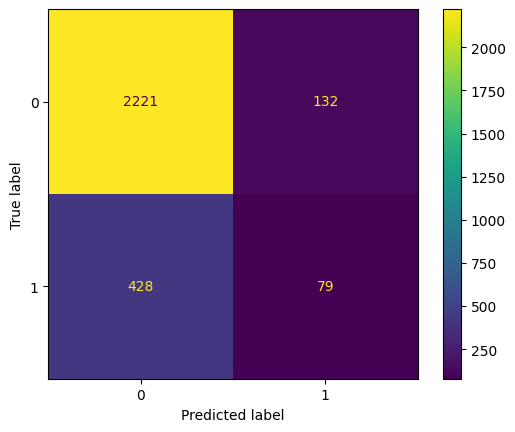

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_pred_test, labels = xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                              display_labels = xgb_cv.classes_)
disp.plot()

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

### **Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

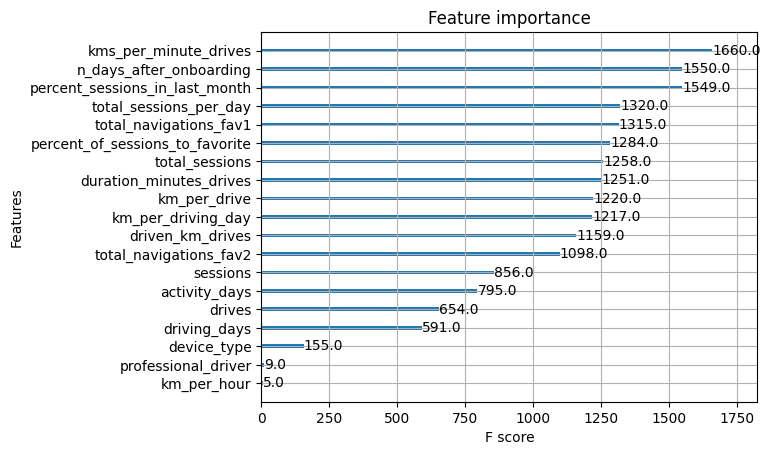

In [ ]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

<a id="6"></a>
### **6. Conclusions and Business Recommendations**

In this project, I successfully built and evaluated several machine learning models to predict user churn for Waze. Through a comprehensive analysis of user behavior data, I identified key differences between churned and retained users, such as the number of drives, total distance driven, and the frequency of app usage. These findings provide valuable insights into how Waze users interact with the app and highlight behaviors that can serve as early indicators of churn.

The Random Forest and XGBoost models demonstrated strong predictive performance, with XGBoost achieving slightly higher accuracy. These ensemble models proved effective in handling complex relationships between variables, offering valuable insights into which features, such as the number of sessions and kilometers driven, most strongly influence churn. Despite the slightly lower interpretability of these models compared to simpler algorithms like logistic regression, their ability to capture non-linear relationships and interactions between features makes them a strong choice for churn prediction in this context.

To further improve the model’s performance, additional features could be introduced. For instance, tracking user activity trends over time, identifying peak usage periods (morning vs. evening), and capturing app feature utilization (e.g., how often users report incidents or use specific navigation features) could provide a more complete picture of user behavior. Additionally, incorporating seasonality effects, user feedback or ratings, and social interactions could help refine the predictions and better identify users at risk of churning.

From a business perspective, these insights suggest several actionable strategies. Waze could focus on retaining high-mileage drivers by offering features that cater to their long-distance driving needs, such as improved highway navigation or specialized real-time traffic updates. Additionally, engaging low-activity users through personalized notifications, special offers, or loyalty programs could help increase app usage and reduce churn. Understanding and addressing user needs—especially those of high-risk, high-mileage users—will be crucial for improving user retention and driving long-term growth.

In summary, the models I built in this analysis provide a robust foundation for predicting user churn, and with further improvement, they can serve as powerful tools for Waze to actively engage with the users at-risk and refine its retention strategies.